# Text Summarizer

## Import Module

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
!pip install rouge

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=588d789ecc5784a8da4ea7895bed312738012544c7895ba1c10e4943889992d9
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
!pip install git+https://github.com/keras-team/keras-nlp.git
#!pip install tensorflow-datasets

  Cloning https://github.com/keras-team/keras-nlp.git to /tmp/pip-req-build-k0uhbmv_
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-nlp.git /tmp/pip-req-build-k0uhbmv_
  Resolved https://github.com/keras-team/keras-nlp.git to commit 619a951adc4e5301b1f30bbe7211c3edda7887b7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.3 MB/

In [ ]:
import pandas as pd
from rouge import Rouge
from rouge_score import rouge_scorer

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

In [ ]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
import time
import keras_nlp
import tensorflow as tf
#import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Define Training Variables

In [ ]:
BATCH_SIZE = 8
NUM_BATCHES = 50
EPOCHS = 10
MAX_ENCODER_SEQUENCE_LENGTH = 1024
MAX_DECODER_SEQUENCE_LENGTH = 256

## Collecting Data

In [ ]:
from datasets import load_dataset

dataset_dict = load_dataset("multi_news")

train_dataset = dataset_dict['train']
validation_dataset = dataset_dict['validation']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for multi_news contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/multi_news
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/44972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5622 [00:00<?, ? examples/s]

In [ ]:
def check_len_every_split(dataset_dict):
    for split in ['train', 'validation', 'test']:
        print(f"Number of rows in {split} dataset: {len(dataset_dict[split])}")

In [ ]:
check_len_every_split(dataset_dict)

Number of rows in train dataset: 44972
Number of rows in validation dataset: 5622
Number of rows in test dataset: 5622


In [ ]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})

In [ ]:
dataset_dict = load_dataset("multi_news")

## Exploratory Data Analysis

In [ ]:
# Convert datasets to pandas DataFrame for easier analysis
train_df = pd.DataFrame(dataset_dict['train'])
validation_df = pd.DataFrame(dataset_dict['validation'])
test_df = pd.DataFrame(dataset_dict['test'])

In [ ]:
def basic_stats(df):
    doc_lengths = df['document'].str.split().apply(len)
    summary_lengths = df['summary'].str.split().apply(len)
    return {
        'average_document_length': doc_lengths.mean(),
        'average_summary_length': summary_lengths.mean(),
        'min_document_length': doc_lengths.min(),
        'max_document_length': doc_lengths.max(),
        'min_summary_length': summary_lengths.min(),
        'max_summary_length': summary_lengths.max()
    }

In [ ]:
# Display basic statistics for each dataset split
print("Train Dataset Stats:", basic_stats(train_df))
print("Validation Dataset Stats:", basic_stats(validation_df))
print("Test Dataset Stats:", basic_stats(test_df))

Train Dataset Stats: {'average_document_length': 1794.3765231699724, 'average_summary_length': 218.25813839722494, 'min_document_length': 0, 'max_document_length': 449621, 'min_summary_length': 34, 'max_summary_length': 973}
Validation Dataset Stats: {'average_document_length': 1752.572038420491, 'average_summary_length': 216.71380291711134, 'min_document_length': 0, 'max_document_length': 123120, 'min_summary_length': 46, 'max_summary_length': 595}
Test Dataset Stats: {'average_document_length': 1797.614727854856, 'average_summary_length': 216.9884382781928, 'min_document_length': 0, 'max_document_length': 145133, 'min_summary_length': 54, 'max_summary_length': 616}


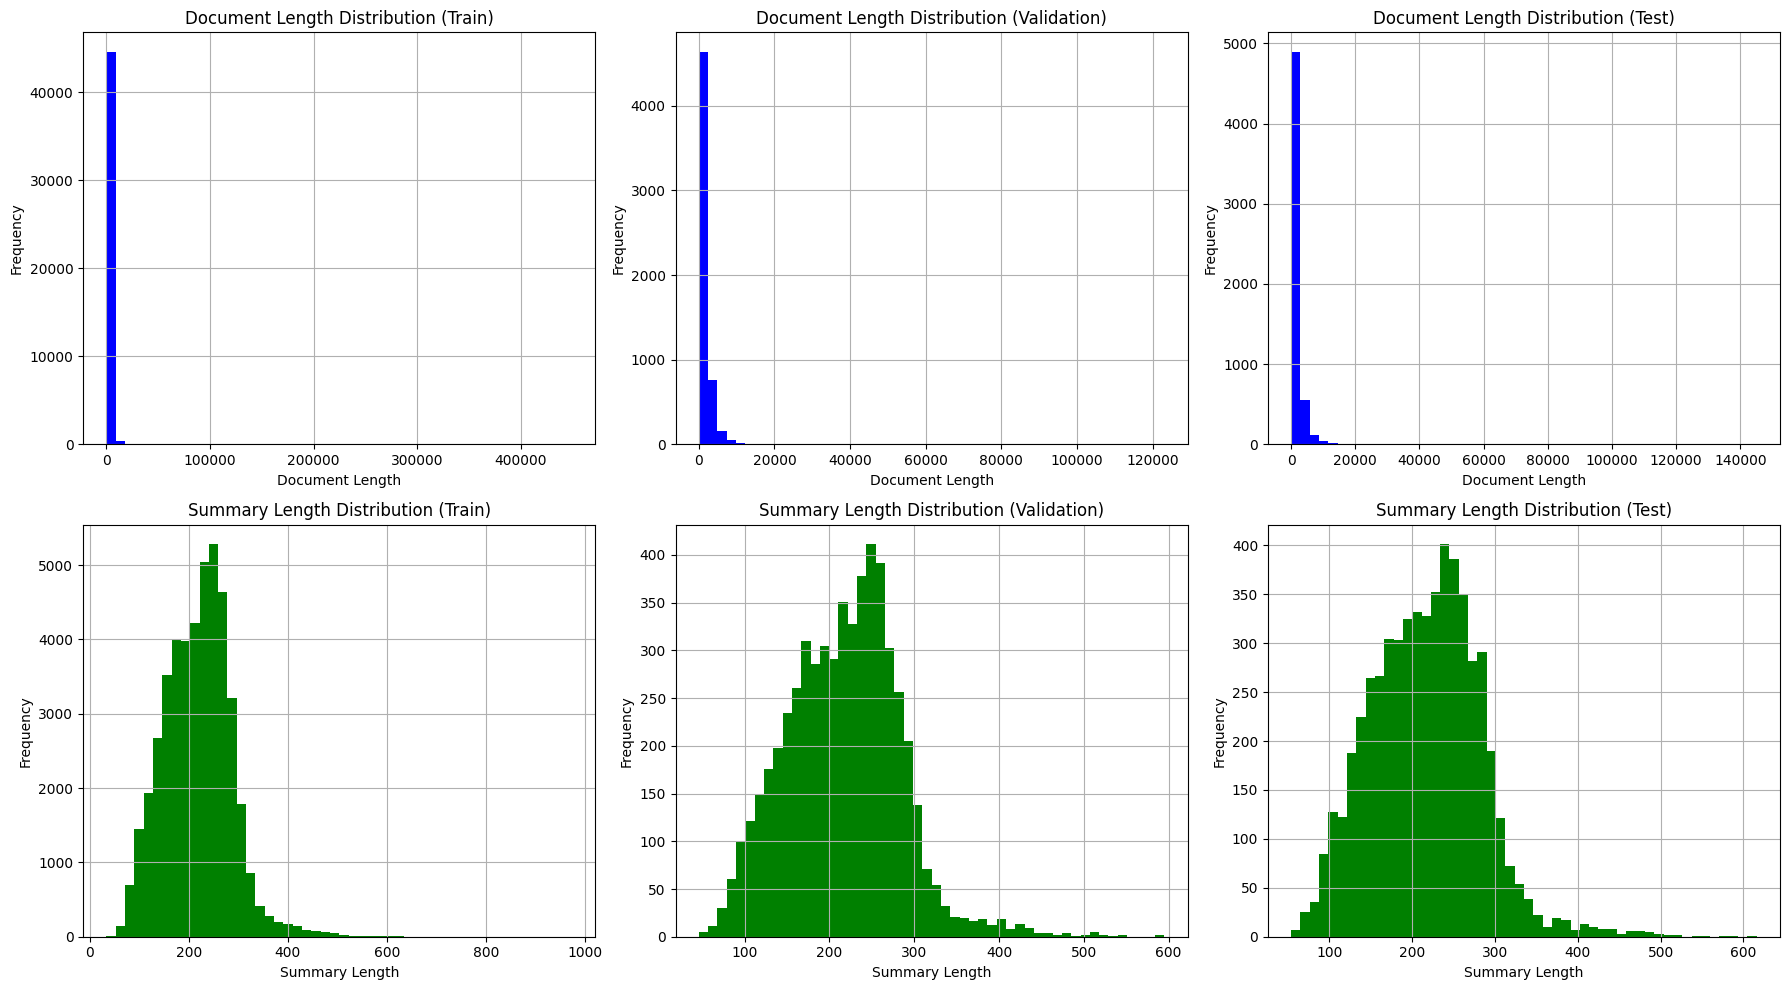

In [ ]:
# Plot histograms for document and summary lengths
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (df, name) in enumerate(zip([train_df, validation_df, test_df], ['Train', 'Validation', 'Test'])):
    df['document'].str.split().apply(len).hist(ax=axes[idx], bins=50, color='blue')
    axes[idx].set_title(f'Document Length Distribution ({name})')
    axes[idx].set_xlabel('Document Length')
    axes[idx].set_ylabel('Frequency')

    df['summary'].str.split().apply(len).hist(ax=axes[idx + 3], bins=50, color='green')
    axes[idx + 3].set_title(f'Summary Length Distribution ({name})')
    axes[idx + 3].set_xlabel('Summary Length')
    axes[idx + 3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Function to plot most common words
def plot_most_common_words(text_series, title, n=20):
    text = ' '.join(text_series.tolist())
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    most_common_words = word_freq.most_common(n)

    words = [word for word, freq in most_common_words]
    frequencies = [freq for word, freq in most_common_words]
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot most common bigrams
def plot_most_common_bigrams(text_series, title, n=10):
    text = ' '.join(text_series.tolist())
    tokens = word_tokenize(text)
    bigrams = ngrams(tokens, 2)
    bigram_freq = Counter(bigrams)
    most_common_bigrams = bigram_freq.most_common(n)

    bigrams = [' '.join(bigram) for bigram, freq in most_common_bigrams]
    frequencies = [freq for bigram, freq in most_common_bigrams]
    plt.figure(figsize=(10, 5))
    plt.bar(bigrams, frequencies)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
plot_most_common_words(train_df['document'], 'Most Common Words in Documents')
plot_most_common_words(train_df['summary'], 'Most Common Words in Summaries')
plot_most_common_bigrams(train_df['document'], 'Most Common Bigrams in Documents')
plot_most_common_bigrams(train_df['summary'], 'Most Common Bigrams in Summaries')

In [ ]:
from textblob import TextBlob

# Function to compute sentiment
def sentiment_analysis(text_series):
    sentiments = text_series.apply(lambda x: TextBlob(x).sentiment.polarity)
    return sentiments.mean()

# Function to calculate word overlap
def word_overlap(doc_series, summary_series):
    overlaps = []
    for doc, summary in zip(doc_series, summary_series):
        doc_words = set(word_tokenize(doc.lower()))
        summary_words = set(word_tokenize(summary.lower()))
        overlap = len(doc_words & summary_words) / len(doc_words)
        overlaps.append(overlap)
    return sum(overlaps) / len(overlaps)

In [ ]:
train_sentiment_docs = sentiment_analysis(train_df['document'])
train_sentiment_summaries = sentiment_analysis(train_df['summary'])
train_overlap = word_overlap(train_df['document'], train_df['summary'])

print(f"Average sentiment polarity in train documents: {train_sentiment_docs}")
print(f"Average sentiment polarity in train summaries: {train_sentiment_summaries}")
print(f"Average word overlap between documents and summaries in train set: {train_overlap}")

## Data Preprocessing

Delete rows that have a summary longer than the document

In [ ]:
for split in ['train', 'validation', 'test']:
    dataset = dataset_dict[split]
    dataset = dataset.map(lambda example: {'document': example['document'], 'summary': example['summary'].strip("–").strip()})
    dataset = dataset.filter(lambda example: len(example['summary']) <= len(example['document']))
    dataset_dict[split] = dataset


Map:   0%|          | 0/44972 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44972 [00:00<?, ? examples/s]

Map:   0%|          | 0/5622 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5622 [00:00<?, ? examples/s]

Map:   0%|          | 0/5622 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5622 [00:00<?, ? examples/s]

In [ ]:
check_len_every_split(dataset_dict)

Number of rows in train dataset: 44556
Number of rows in validation dataset: 5574
Number of rows in test dataset: 5564


In [ ]:
dataset_dict['train']['summary'][:2]

['The unemployment rate dropped to 8.2% last month, but the economy only added 120,000 jobs, when 203,000 new jobs had been predicted, according to today\'s jobs report. Reaction on the Wall Street Journal\'s MarketBeat Blog was swift: "Woah!!! Bad number." The unemployment rate, however, is better news; it had been expected to hold steady at 8.3%. But the AP notes that the dip is mostly due to more Americans giving up on seeking employment.',
 'Shelly Sterling plans "eventually" to divorce her estranged husband Donald, she tells Barbara Walters at ABC News. As for her stake in the Los Angeles Clippers, she plans to keep it, the AP notes. Sterling says she would "absolutely" fight any NBA decision to force her to sell the team. The team is her "legacy" to her family, she says. "To be honest with you, I\'m wondering if a wife of one of the owners … said those racial slurs, would they oust the husband? Or would they leave the husband in?"']

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices({
    "encoder_text":dataset_dict['train']['document'],
    "decoder_text":dataset_dict['train']['summary'],
})
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.take(NUM_BATCHES)

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices({
    "encoder_text":dataset_dict['validation']['document'],
    "decoder_text":dataset_dict['validation']['summary'],
})
val_ds = val_ds.batch(BATCH_SIZE)
val_ds = val_ds.take(NUM_BATCHES)